Build a regression model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm    

Provide model output and an interpretation of the results. 

In [21]:
# Recall the file for the joined CSV file
data_clean  = pd.read_csv("../Downloads/data_clean.csv") 
data_clean 

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
0,8.95,702.9,0.989557,14
1,8.66,779.8,0.980499,5
2,8.79,595.3,0.958578,0
3,9.22,725.0,0.988464,0
4,8.48,442.4,0.948420,8
...,...,...,...,...
417,9.17,675.2,0.989664,23
418,9.01,668.0,0.969746,3
419,9.25,541.2,0.988022,6
420,9.11,726.4,0.973419,10


In [22]:
correlation_matrix = data_clean.corr(numeric_only=True)
correlation_matrix   

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
Average_rating_F,1.000000,-0.029710,0.749818,0.011500
Average_dist_F,-0.029710,1.000000,-0.022423,-0.069532
Average_popularity_F,0.749818,-0.022423,1.000000,0.226050
Number of Bikes,0.011500,-0.069532,0.226050,1.000000


In [23]:
y = data_clean['Number of Bikes']
X = data_clean[['Average_rating_F', 'Average_dist_F', 'Average_popularity_F']]
X = sm.add_constant(X)  # adds a column of 1's for the intercept
X.describe()                 

,const,Average_rating_F,Average_dist_F,Average_popularity_F
count,422.0,422.000000,422.000000,422.000000
mean,1.0,8.940877,676.959479,0.975643
std,0.0,0.366281,90.375833,0.019034
min,1.0,7.720000,425.800000,0.911584
25%,1.0,8.782500,615.475000,0.965722
50%,1.0,9.075000,680.450000,0.981341
75%,1.0,9.210000,743.600000,0.990727
max,1.0,9.350000,914.100000,0.998757


In [24]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)       

In [27]:
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:        Number of Bikes   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     17.73
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           7.48e-11
Time:                        23:31:26   Log-Likelihood:                -1344.0
No. Observations:                 422   AIC:                             2696.
Df Residuals:                     418   BIC:                             2712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -93.5034 

In [ ]:
# Interpretation Summary
Overall, the model suggests that the characteristics of the points of interest(e.g.popularity and rating of bars and restaurants (do not have a strong correlation with the estimated Number of bikes available at a given station. 

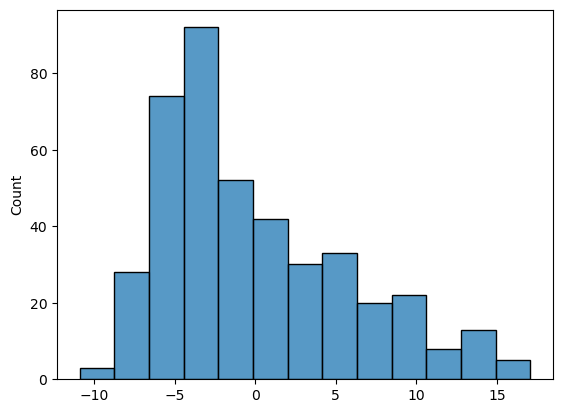

In [25]:
residuals = results.resid

sns.histplot(residuals)
plt.show()     

In [28]:
# To extract the co-efficients
results.params      

const                   -93.503370
Average_rating_F         -6.158383
Average_dist_F           -0.004757
Average_popularity_F    162.163990
dtype: float64

In [33]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_F + b2*known_rating_F + b3*known_popularity_F
b0 = results.params['const']
b1 = results.params['Average_popularity_F']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

#For
known_dist_F = 425.8
known_rating_F = 9.35
known_popularity_F = 0.998757
predicted_num_bikes = b0 + b1*known_popularity_F + b2*known_rating_F + b3*known_dist_F
predicted_num_bikes     

8.852531728409

In [34]:
# The model equation for prediction is: number_of_bikes = b0 + b1*known_distance_F + b2*known_rating_F + b3*known_popularity_F
b0 = results.params['const']
b1 = results.params['Average_popularity_F']
b2 = results.params['Average_rating_F']
b3 = results.params['Average_dist_F']

#For
known_dist_F = 914.10
known_rating_F = 7.72
known_popularity_F = 0.911584
predicted_num_bikes = b0 + b1*known_popularity_F + b2*known_rating_F + b3*known_dist_F
predicted_num_bikes      

2.4314064019594728

Overall, the model suggests that the characteristics of the points of interest(e.g.popularity and rating of bars and restaurants (do not have a strong correlation with the estimated Number of bikes available at a given station. 

However, it does appear that with a shorter average distance from highly rated and popular bars/restaurants within 1000m radius of the bike station, more bikes are available at the station. On the other hand, with lower ratings bars/restaurants around, fewer bikes are available at the bike station.

# Stretch

How can you turn the regression model into a classification model?

In [ ]:
We can classify independent variables, rating and popularity, into good, high or very high based on 1-10 scales.